## Part 2 ##

Here is our position vs. time graph for the ball once it hit the water:

![Alt text](image.png)
To calculate the velocity and angle, we first caluclate the x and y velocities independently. To do this, we take the first two data points from the x and y, subtract the first from the second, and divide by the time between them. This gives us the average velocity between those points. which we can estimate to be the starting velocities. To caluclate the magnitude and angle of the velocity, we use the Pythagoren theorem to calculate the distance between the points in 2d space, and to caluclate $\theta$, we use the fact that $sin(\theta) = O/H$, so $\theta = arcsin(O/H) = arcsin(v_y / v)$

The full set of equations looks like
$$v_x = \frac{x_2 - x_1}{t_2 - t_1}$$
$$v_y = \frac{y_2 - y_1}{t_2 - t_1}$$
$$v = \sqrt{v_x^2 + v_y^2}$$
$$\theta = arcsin(v_y / v)$$

Plugging in the values $x_1 = 0.6619$, $x_2 = 0.6416$, $y_1 = 0.3505$, $y_2 = 0.3437$, $t_1 = 0.2549$, and $t_2 = 0.2592$, we get that $v = 4.98$ m/s, and $\theta = -0.32$ radians ($-18.52$ degrees) below the horizontal. 


## Part 3 ##
With core mehcnaics assumptions, we ignore drag and bouancy, and just focus on gravity. To find the range of the ball, we first have to find how long it's in the air, which is the time it takes to fall to the ground. The DVAT equation to use here is
$$y_f = y_i + v_y t + \frac{1}{2} a t^2$$
$y_i$ comes from our data, $v_y = \frac{y_2 - y_1}{t_2 - t_1}$, $a$ is the gravitational field strength near Earth ($-9.81 \frac{m}{s^2}$),  and $y_f$ is 0 since the ball is falling to the bottom of the tank. Rearranging for time, we find that
$$t = \frac{-v_y \pm \sqrt{v_y^2 - 4 a y_i}}{2a}$$ 
From our data (and using $-$ instead of $+$), we can calculate that $t = 0.12$ s. To find the range the ball travels, we can use that same dvat, only solving for $x_f$, given that $x_i$ can be thought of as 0 and there isn't any acceleration in the x direction. Using that equation, we find that $x_f = 0.59$ m.

Drag force: [3.5954602  1.20441988], Bouancy: [0.        0.1232693]
Drag force: [3.30158101 1.10818398], Bouancy: [0.        0.1232693]
Drag force: [3.04278372 1.0234387 ], Bouancy: [0.        0.1232693]
Drag force: [2.81364999 0.94840917], Bouancy: [0.        0.1232693]
Drag force: [2.60977551 0.88165275], Bouancy: [0.        0.1232693]
Drag force: [2.42754931 0.82198665], Bouancy: [0.        0.1232693]
Drag force: [2.26398738 0.76843344], Bouancy: [0.        0.1232693]
Drag force: [2.11660579 0.72017955], Bouancy: [0.        0.1232693]
Drag force: [1.98332292 0.67654314], Bouancy: [0.        0.1232693]
Drag force: [1.86238334 0.63694925], Bouancy: [0.        0.1232693]
Drag force: [1.7522981  0.60091019], Bouancy: [0.        0.1232693]
Drag force: [1.65179735 0.56801006], Bouancy: [0.        0.1232693]
Drag force: [1.55979265 0.53789236], Bouancy: [0.        0.1232693]
Drag force: [1.47534657 0.51025007], Bouancy: [0.        0.1232693]
Drag force: [1.39764815 0.48481757], Bouancy: [0

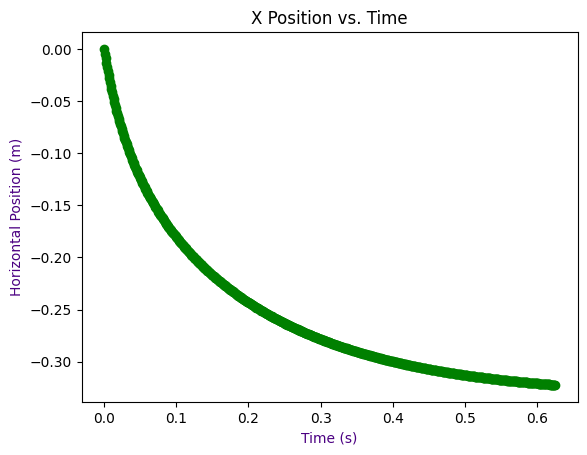

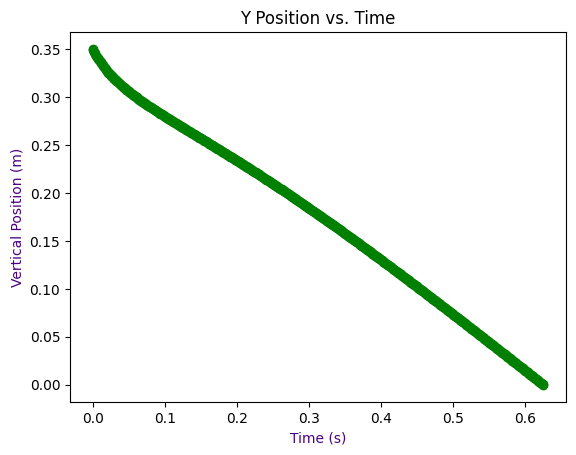

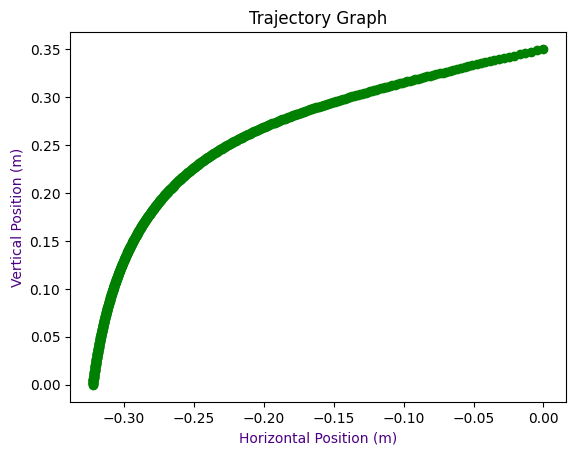

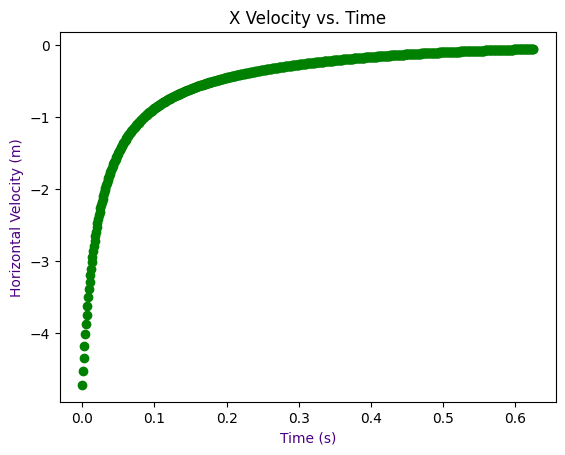

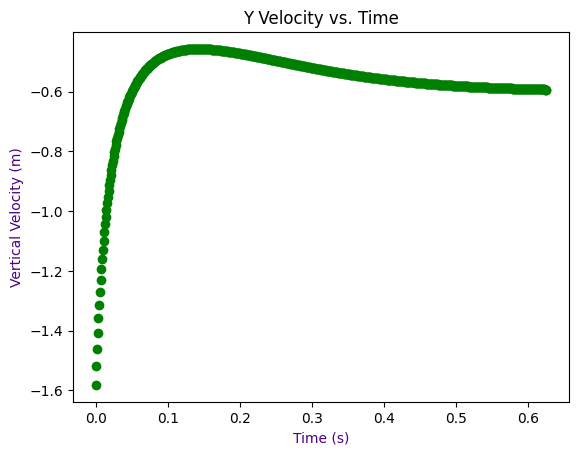

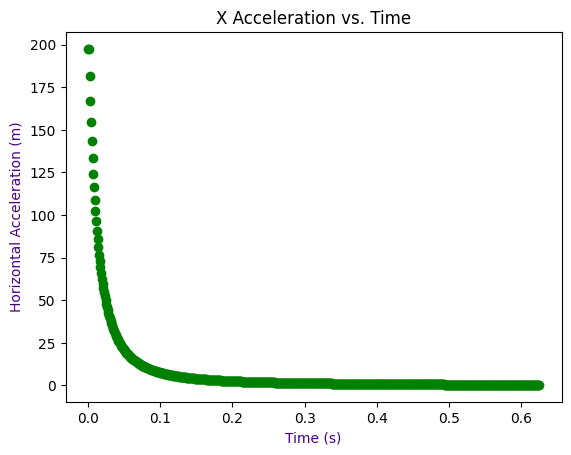

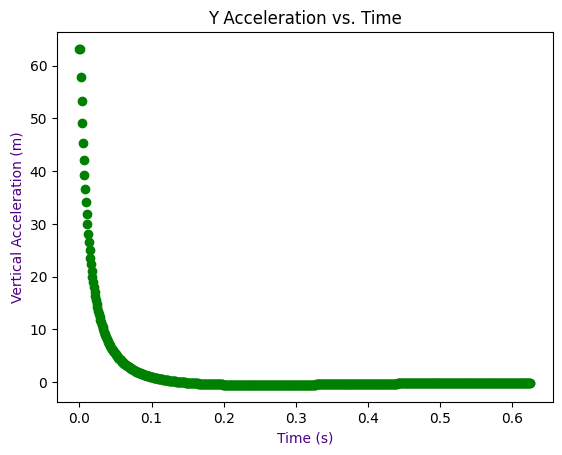

Predicted final x position: -0.32224619410597777
Percent difference compared to our original estimate: 83.08982721638148
Actual final x position: -0.24830000000000002
Percent difference compared to our new prediciton: 29.780988363261272


In [12]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# constants
m = 1.82E-2 # mass of our ball 
g = np.array([0, -9.8]) # m / s / s

theta = 18.52
v = 4.98
v = np.array([-v * np.cos(theta * np.pi / 180), -v * np.sin(theta * np.pi / 180)])

pos = np.array([0, 0.3505])

time = 0 # seconds
dt = 0.001 # seconds

roe = 1000 # kg/m^3, density of water at 40 f (https://www.usgs.gov/special-topics/water-science-school/science/water-density)
r = 2.9E-2  / 2 # found the diameter, divide by two to find the radius
Cd = np.pi * r ** 2 # Cross sectional area of a sphere is a circle, Area = pi r squared
A = 0.47 # from https://en.wikipedia.org/wiki/Drag_coefficient, drag coefficient of a sphere

F_drag_without_v = 0.5 * roe * Cd * A # Newtons

# Bouyancy = fluid density * g * fluid volume

volume = 4 / 3 * np.pi * r ** 3 # volume of a sphere

F_b = np.array([0, 9.8 * roe * volume]) # bouyancy = g * water density * volume of displaced water

# lists
hlist = [pos[1]] # meters
xlist = [pos[0]] # meters

vxlist = [v[0]]
vylist = [v[1]]

# caluclate initial acceleration
v_mag = np.linalg.norm(v) # normalize velocity
v_unit = v / v_mag # get the unit vector for velocity

F_drag = v_unit * F_drag_without_v * (v_mag ** 2) * -1 # Newtons, multiply by -1 bc in opposite direction 
F_net = (m * g) + F_b + F_drag # net force is Fg + Fb + Fd
a = F_net / m

axlist = [a[0]]
aylist = [a[1]]

tlist = [time] # seconds

while pos[1] > 0:
    v_mag = np.linalg.norm(v) # normalize velocity
    v_unit = v / v_mag # get the unit vector for velocity

    F_drag = v_unit * F_drag_without_v * (v_mag ** 2) * -1 # Newtons, multiply by -1 bc in opposite direction 
    print(f"Drag force: {F_drag}, Bouancy: {F_b}")
    F_net = (m * g) + F_b + F_drag # net force is Fg + Fb + Fd

    a = F_net / m # F = ma, so a = F/m
    v = v + a * dt # update velocity
    pos = pos + v * dt # update position


    time += dt # update time

    # update lists
    hlist.append(pos[1])
    xlist.append(pos[0])

    vxlist.append(v[0])
    vylist.append(v[1])

    axlist.append(a[0])
    aylist.append(a[1])

    tlist.append(time)

# graphs!

# X and Y positions 

plt.scatter(tlist, xlist, color="green") # just a scatter plot
plt.xlabel("Time (s)", color="indigo") # label the x axis
plt.ylabel("Horizontal Position (m)", color="indigo") # label the y axis
plt.title("X Position vs. Time") # title

plt.show() # show plot

plt.scatter(tlist, hlist, color="green") # just a scatter plot
plt.xlabel("Time (s)", color="indigo") # label the x axis
plt.ylabel("Vertical Position (m)", color="indigo") # label the y axis
plt.title("Y Position vs. Time") # title

plt.show() # show plot

# Trajectory

plt.scatter(xlist, hlist, color="green") # just a scatter plot
plt.xlabel("Horizontal Position (m)", color="indigo") # label the x axis
plt.ylabel("Vertical Position (m)", color="indigo") # label the y axis
plt.title("Trajectory Graph") # title

plt.show() # show plot

# Velocites

plt.scatter(tlist, vxlist, color="green") # just a scatter plot
plt.xlabel("Time (s)", color="indigo") # label the x axis
plt.ylabel("Horizontal Velocity (m)", color="indigo") # label the y axis
plt.title("X Velocity vs. Time") # title

plt.show() # show plot

plt.scatter(tlist, vylist, color="green") # just a scatter plot
plt.xlabel("Time (s)", color="indigo") # label the x axis
plt.ylabel("Vertical Velocity (m)", color="indigo") # label the y axis
plt.title("Y Velocity vs. Time") # title

plt.show() # show plot

# Acceleration

plt.scatter(tlist, axlist, color="green") # just a scatter plot
plt.xlabel("Time (s)", color="indigo") # label the x axis
plt.ylabel("Horizontal Acceleration (m)", color="indigo") # label the y axis
plt.title("X Acceleration vs. Time") # title

plt.show() # show plot

plt.scatter(tlist, aylist, color="green") # just a scatter plot
plt.xlabel("Time (s)", color="indigo") # label the x axis
plt.ylabel("Vertical Acceleration (m)", color="indigo") # label the y axis
plt.title("Y Acceleration vs. Time") # title

plt.show() # show plot

estimated_x_diff = -0.59 # In meters, and it's negative because it's going to the left
final_x = xlist[-1]
percent_diff = abs((final_x - estimated_x_diff) / final_x) * 100
print(f"Predicted final x position: {final_x}\nPercent difference compared to our original estimate: {percent_diff}")
# find the difference between the first and last x values, because we've based our estimates on having the first x at 0
actual_final_position = 0.4136 - 0.6619
percent_diff= abs((actual_final_position - final_x) / actual_final_position) * 100
print(f"Actual final x position: {actual_final_position}\nPercent difference compared to our new prediciton: {percent_diff}")
